In [41]:
import numpy as np
from math import sqrt

def HOLY_JESUS_it_is_SVD_by_OLEG(a):
    s, u = np.linalg.eig(a);
    s.sort()
    return s

def sorting_eig(s, u):
    i = 0
    while (i < len(s)):
        if (s[i] == 0):
            s = np.delete(s, i)
            u = np.delete(u, i, axis = 1)
            i -= 1
        i += 1
    order = np.argsort(s)
    s_res = s.copy()
    u_res = np.zeros(u.T.shape)
    for i in range(len(order)):
        s_res[i] = s[order[i]]
        u_res[i] = u.T[order[i]]
    return s_res[: :-1], u_res.T[:, : : -1]

def svd(a):
    if a.shape[0] >= a.shape[1]:
        m = a @ a.T
        s, u = np.linalg.eig(m)
        s, u = sorting_eig(s, u)
        s = np.diagflat(s)
        s_inv = s.copy()
        for i in range(len(s)):
            s_inv[i][i] = s_inv[i][i] ** (-1)
        print(u.shape, s.shape)
        v = s_inv @ u.T @ a
        return u, s, v

    m = a.T @ a
    s, v = np.linalg.eig(m)
    s, v = sorting_eig(s, v)
    s = np.diagflat(s)
    s_inv = s.copy()
    for i in range(len(s)):
        s_inv[i][i] = s_inv[i][i] ** (-1)
    u = s_inv @ v.T @ a
    return u, s, v

In [16]:
u, s, v = svd(np.array([[1, 1, 0],
                        [1, 1, 0],
                        [0, 0, 1],
                        [1, 0, -1]]))
print(u @ s @ v, sep = '\n')

(4, 4) (4, 4)
[[  1.00000000e+00   1.00000000e+00   2.55222486e-16]
 [  1.00000000e+00   1.00000000e+00   1.19249298e-17]
 [  2.77555756e-17  -8.32667268e-17   1.00000000e+00]
 [  1.00000000e+00  -3.60822483e-16  -1.00000000e+00]]


In [12]:
import pandas as pd
from skimage import io
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')
print(data.head())
df = pd.DataFrame(data)
df_filtered = df.query('label == 2')
data = np.array(df_filtered, dtype=float)
y, x_data = np.hsplit(data, [1])

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [31]:
# try to use only first five eighvalues
def try_kill_big_ei(image, alpha = 5):
    u, s, v = svd(image)
    s = s[alpha:, alpha:]
    u = u[:, alpha:]
    v = v[alpha:, :]
    return u @ s @ v

In [32]:
def try_kill_low_ei(image, alpha = 5):
    u, s, v = svd(image)
    s = s[:alpha, :alpha]
    u = u[:, :alpha]
    v = v[:alpha, :]
    return u @ s @ v

/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


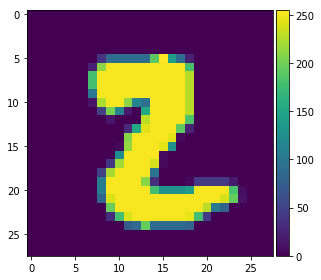

(28, 20) (20, 20)


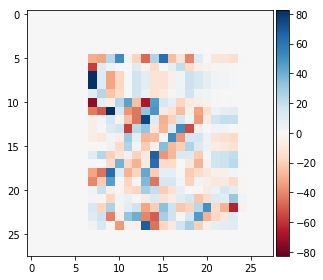

(28, 20) (20, 20)


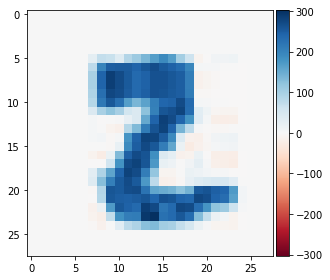

In [33]:
io.imshow(x_data[0].reshape(28, 28))
plt.show()
io.imshow(try_kill_big_ei(x_data[0].reshape(28, 28)))
plt.show()
io.imshow(try_kill_low_ei(x_data[0].reshape(28, 28)))
plt.show()

In [56]:
from PIL import Image
import numpy as np
import os

files = os.listdir(path="jaffe")

# happy 0, sad 1, surprise 2,
# angry 3, disgust 4, fear 5, neutral 6
singular_values = {"HA": [], "SA":[], "SU":[]
                  ,"AN":[], "DI":[], "FE":[], "NE":[]}


data = []
for name in files:
    im = Image.open('jaffe/' + name)
    data.append((np.array(im), name[3:5]))

data_train = data[ : int(len(data) * 0.75)]
data_test = data[int(len(data) * 0.75) :]

In [57]:
for sample in data_train:
    S = HOLY_JESUS_it_is_SVD_by_OLEG(sample[0])
    singular_values[sample[1]].append(S)

for key in singular_values:
    singular_values[key] = np.mean(singular_values[key], axis=0)

In [58]:
def dist(x,y):   
    return np.sqrt(np.sum((x - y) ** 2))

def classify(x):
    dist_min = 0
    res = 'nope'
    for key in singular_values:
        if (dist_min == 0):
            dist_min = dist(x, singular_values[key])
            res = key
        else:
            curr_dist = dist(x, singular_values[key])
            if (dist_min > curr_dist):
                dist_min = curr_dist
                res = key
    return res

In [59]:
check = 0
for sample in data_test:
    S = HOLY_JESUS_it_is_SVD_by_OLEG(sample[0])
    if (sample[1] == classify(S)):
        check += 1
print("accuracy:", check / len(data_test) * 100)

accuracy: 20.37037037037037
